In [1]:
import pandas as pd
from sklearn import metrics
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from Convert import convert_to_dataframe

In [2]:
iris = convert_to_dataframe(load_iris())

In [3]:
iris.sample(20)

,sepallength,sepalwidth,petallength,petalwidth,target
61,5.9,3.0,4.2,1.5,versicolor
73,6.1,2.8,4.7,1.2,versicolor
106,4.9,2.5,4.5,1.7,virginica
44,5.1,3.8,1.9,0.4,setosa
12,4.8,3.0,1.4,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
141,6.9,3.1,5.1,2.3,virginica
7,5.0,3.4,1.5,0.2,setosa
83,6.0,2.7,5.1,1.6,versicolor


In [18]:
X = iris.drop(['target'], axis=1)
Y = iris['target']
feature_names = iris.columns.values.tolist()[:-1]
class_names = Y.unique().tolist()
print(feature_names)
print(class_names)

['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
['setosa', 'versicolor', 'virginica']


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [6]:
x_train

,sepallength,sepalwidth,petallength,petalwidth
127,6.1,3.0,4.9,1.8
77,6.7,3.0,5.0,1.7
13,4.3,3.0,1.1,0.1
61,5.9,3.0,4.2,1.5
75,6.6,3.0,4.4,1.4
...,...,...,...,...
47,4.6,3.2,1.4,0.2
36,5.5,3.5,1.3,0.2
104,6.5,3.0,5.8,2.2
111,6.4,2.7,5.3,1.9


In [7]:
clf = DecisionTreeClassifier()

In [8]:
clf = clf.fit(x_train, y_train)

[Text(0.4, 0.9285714285714286, 'petallength <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]\nclass = versicolor'),
 Text(0.3, 0.7857142857142857, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7857142857142857, 'petallength <= 4.85\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]\nclass = versicolor'),
 Text(0.2, 0.6428571428571429, 'petalwidth <= 1.65\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]\nclass = versicolor'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.3, 0.5, 'sepalwidth <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.6428571428571429, 'petalwidth <= 1.75\ngini = 0.133\nsamples = 42\nvalue = [0, 3, 39]\nclass = virginica'),
 Text(0.7, 0.5, 'petallength 

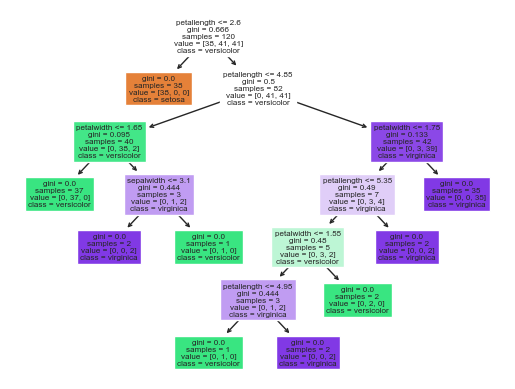

In [9]:
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)

In [10]:
y_pred = clf.predict(x_test)

In [11]:
y_test_ind = y_test.reset_index()
print(pd.concat([y_test_ind, pd.DataFrame({"y_pred": y_pred})], axis=1))

    index      target      y_pred
0       0      setosa      setosa
1      41      setosa      setosa
2      91  versicolor  versicolor
3       7      setosa      setosa
4      31      setosa      setosa
5      98  versicolor  versicolor
6     144   virginica   virginica
7      33      setosa      setosa
8      62  versicolor  versicolor
9      38      setosa      setosa
10    120   virginica   virginica
11    107   virginica   virginica
12     48      setosa      setosa
13    116   virginica   virginica
14     87  versicolor  versicolor
15     49      setosa      setosa
16    114   virginica   virginica
17    126   virginica   virginica
18    112   virginica   virginica
19     52  versicolor  versicolor
20     54  versicolor  versicolor
21    148   virginica   virginica
22     24      setosa      setosa
23    130   virginica   virginica
24     94  versicolor  versicolor
25     58  versicolor  versicolor
26     50  versicolor  versicolor
27     39      setosa      setosa
28      5     

In [12]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred, labels=class_names))

Confusion matrix:
[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]


In [14]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {round(accuracy, 2)}%")

Accuracy: 100.0%


In [15]:
my_features = [[5.5, 3.5, 1.3, 0.2]]
prediction = clf.predict(my_features)
print(prediction)

['setosa']


C:\Users\attri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [16]:
clf.feature_importances_

array([0.        , 0.01667709, 0.91232616, 0.07099675])

In [17]:
clf.score(x_test, y_test)

1.0